## Libraries

In [1]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt

## Making list of all csv files 

In [2]:
# changing our current directory where our csv files are saved
os.chdir("E:\Pandas-Sales-Analysis\SalesAnalysis\Sales_Data")

In [3]:
# only choosing files with .csv extension
extension = 'csv'

all_filenames = [i for i in glob.glob('*_2019.csv')]

# if we have not set this to current directory, then we have to pass all the files:
# Another way: all_filenames = [i for i in glob.glob("E:\Pandas-Sales-Analysis\SalesAnalysis\Sales_Data\January_2019.csv")]

all_filenames

['April_2019.csv',
 'August_2019.csv',
 'December_2019.csv',
 'February_2019.csv',
 'January_2019.csv',
 'July_2019.csv',
 'June_2019.csv',
 'March_2019.csv',
 'May_2019.csv',
 'November_2019.csv',
 'October_2019.csv',
 'September_2019.csv']

## Merging 12 months data into single csv file

In [4]:
# Initialising empty data frame to store 12 months data
all_data = pd.DataFrame()

for f in all_filenames:
    df = pd.read_csv(f) 
   
    all_data = pd.concat([all_data,df])
    # pd.concat([ 1. df: where to concatenate into, 2. df which you want to add in first data frame ])

# changing a data frame to csv file using .to_csv
all_data.to_csv( "combined_data.csv", index=False)
# dataframe_name.to_csv('csv_file_name')

print("Size of merged data frame: ",all_data.shape)

all_data.shape

Size of merged data frame:  (186849, 6)


(186849, 6)

# Cleaning or data

## Columns with missing values

In [5]:
missing_values = all_data.isna().any()
missing_values

Order ID            True
Product             True
Quantity Ordered    True
Price Each          True
Order Date          True
Purchase Address    True
dtype: bool

## Rows with missing values

In [6]:
missing_val_2 = all_data[all_data.isnull().any(axis=1)]
missing_val_2

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
355,NaN,NaN,NaN,NaN,NaN,NaN
734,NaN,NaN,NaN,NaN,NaN,NaN
1432,NaN,NaN,NaN,NaN,NaN,NaN
1552,NaN,NaN,NaN,NaN,NaN,NaN
1570,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
10012,NaN,NaN,NaN,NaN,NaN,NaN
10274,NaN,NaN,NaN,NaN,NaN,NaN
10878,NaN,NaN,NaN,NaN,NaN,NaN
11384,NaN,NaN,NaN,NaN,NaN,NaN


## Number of rows with mising values 

In [7]:
rows,columns = missing_val_2.shape
rows

544

## Deleting only those rows which are totally NAN 

In [8]:
all_data.dropna(axis=0,how='all',inplace=True)

## Checking NAN values  

In [9]:
check_nan = all_data.isnull().any()
check_nan

Order ID            False
Product             False
Quantity Ordered    False
Price Each          False
Order Date          False
Purchase Address    False
dtype: bool

# Converting Order Date(string datatype) to DateTime format
## It gives parser error when we are trying to convert month column to DateTime format

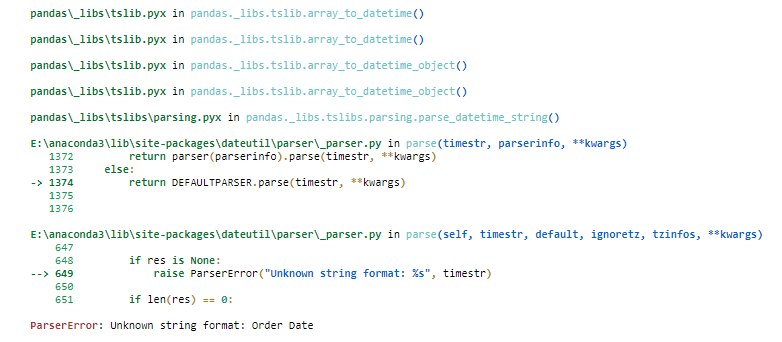

In [10]:
from IPython.display import Image
Image(filename =r'E:\eCommerce-Sales-Analysis\Images\error1.png')

## There is still some problematic rows, we have to clean them. 

In [11]:
all_data['month'] = all_data['Order Date'].str[0:2]
all_data['month'].sample(20)

8939     09
6929     10
14292    03
4131     04
5427     10
6117     12
10841    12
5906     01
20178    12
5811     09
3543     10
12118    05
8772     09
4855     07
11639    05
15593    12
6111     05
11869    07
15944    10
16249    05
Name: month, dtype: object

## There is presence of string 'Or' in month column, we have to clean it 
## That's why we are facing errors while converting data type

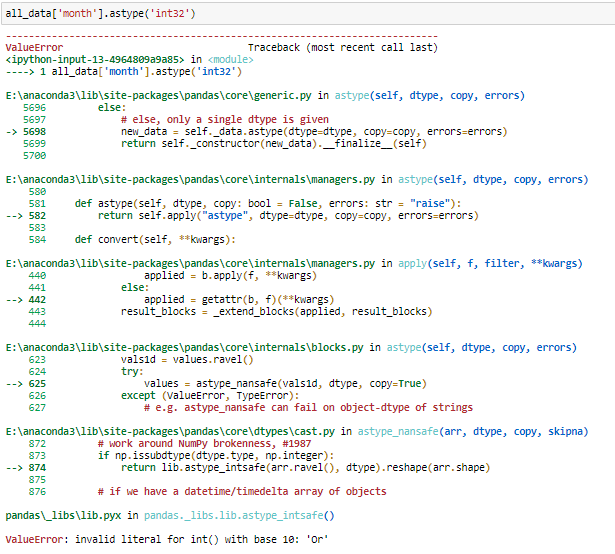

In [12]:
from IPython.display import Image
Image(filename =r'E:\eCommerce-Sales-Analysis\Images\error2.png')

# Cleaning Data - 2
## Removing 'Or' from month column

In [13]:
# Only putting those rows which doesn't contain 'Or' in month section
all_data = all_data[~all_data['month'].str.contains("Or")]
# Putting ~ works as an invert

# Another way: all_data = all_data[all_data['Month'].str[0:] != "Or"]

In [14]:
all_data['month'].str.contains("Or").any()

False

## Converting datatype of columns

In [15]:
all_data['month'] = all_data['month'].astype('int32')
all_data['Price Each'] = all_data['Price Each'].astype('float')
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype('int32')

# What was the best month for sales?

## Calculating total sales  

In [16]:
# Making a total_sales column
all_data['total_sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
val = all_data.groupby(['month']).agg({'total_sales':'sum'})
val.round(2)

,total_sales
month,
1,1822256.73
2,2202022.42
3,2807100.38
4,3390670.24
5,3152606.75
6,2577802.26
7,2647775.76
8,2244467.88
9,2097560.13


In [17]:
all_data.sample(7)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,total_sales
1684,163609,LG Washing Machine,1,600.00,03/25/19 10:30,"64 Elm St, Los Angeles, CA 90001",3,600.00
10991,187049,AAA Batteries (4-pack),1,2.99,04/24/19 14:58,"153 Johnson St, Austin, TX 73301",4,2.99
3392,197314,USB-C Charging Cable,1,11.95,05/16/19 22:00,"944 Johnson St, Los Angeles, CA 90001",5,11.95
1247,142419,Wired Headphones,2,11.99,01/17/19 10:20,"947 2nd St, New York City, NY 10001",1,23.98
23444,318063,USB-C Charging Cable,1,11.95,12/13/19 13:56,"2 Hickory St, Seattle, WA 98101",12,11.95
71,150572,27in FHD Monitor,1,149.99,02/06/19 07:38,"523 Spruce St, Atlanta, GA 30301",2,149.99
10932,204480,20in Monitor,1,109.99,05/12/19 23:57,"187 Lincoln St, Portland, OR 97035",5,109.99


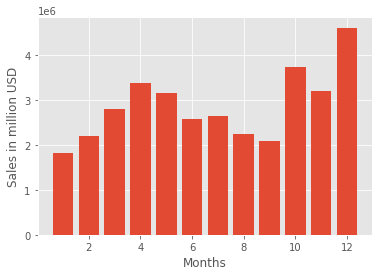

In [37]:
months = [month for month,data in all_data.groupby(['month'])]
# Method2: months = range(1,13)

plt.bar(months,val['total_sales'])
plt.xlabel('Months')
plt.ylabel('Sales in million USD')
plt.style.use('ggplot')
plt.show()

### December has highest sales of about 4.6 million USD

# What city sold the most product ?


In [19]:
all_data['city'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1])

In [20]:
all_data['city'].values

array([' Dallas', ' Boston', ' Los Angeles', ..., ' San Francisco',
       ' San Francisco', ' San Francisco'], dtype=object)

In [21]:
(all_data.values == 'Los Angeles').any()

False

## There are some whitespace character in 'city' column 

In [22]:
(all_data.values == ' Los Angeles').any()

True

## Removing whitespace character in 'city' column

In [23]:
all_data['city'] = all_data['city'].apply(lambda y: y.strip())

In [24]:
all_data['city'].values

array(['Dallas', 'Boston', 'Los Angeles', ..., 'San Francisco',
       'San Francisco', 'San Francisco'], dtype=object)

## Many states have same city names, so we have to report cities with their state name

In [25]:
def finding_state(address):
    return address.split(',')[2].split(' ')[1]

all_data['city'] = all_data['city'] + all_data['Purchase Address'].apply(lambda x:'(' + finding_state(x) + ')')
all_data['city'].values

array(['Dallas(TX)', 'Boston(MA)', 'Los Angeles(CA)', ...,
       'San Francisco(CA)', 'San Francisco(CA)', 'San Francisco(CA)'],
      dtype=object)

## Total sales city wise in USD 

In [26]:
sales = all_data.groupby(['city']).agg({'total_sales':'sum'})
sales['total_sales'].round(2)

city
Atlanta(GA)          2795498.58
Austin(TX)           1819581.75
Boston(MA)           3661642.01
Dallas(TX)           2767975.40
Los Angeles(CA)      5452570.80
New York City(NY)    4664317.43
Portland(ME)          449758.27
Portland(OR)         1870732.34
San Francisco(CA)    8262203.91
Seattle(WA)          2747755.48
Name: total_sales, dtype: float64

In [27]:
cities = [city for city,data in all_data.groupby(['city'])]
cities

['Atlanta(GA)',
 'Austin(TX)',
 'Boston(MA)',
 'Dallas(TX)',
 'Los Angeles(CA)',
 'New York City(NY)',
 'Portland(ME)',
 'Portland(OR)',
 'San Francisco(CA)',
 'Seattle(WA)']

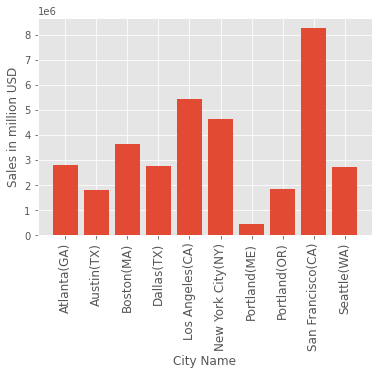

In [40]:
plt.bar(cities,sales['total_sales'])
plt.xticks(cities,rotation='vertical',size=12)
plt.xlabel('City Name')
plt.ylabel('Sales in million USD')
plt.style.use('ggplot')
plt.show()

### San Francisco,California have highest sales 

# What time should we display advertisements to maximize the likelihood of purchases?

In [31]:
# Converting column to date time format
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [33]:
all_data['hours'] = all_data['Order Date'].dt.hour

no_of_sales = all_data.groupby(['hours']).agg({'Order ID':'count'})
no_of_sales

,Order ID
hours,
0,3910
1,2350
2,1243
3,831
4,854
5,1321
6,2482
7,4011
8,6256


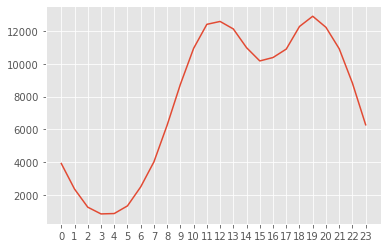

In [38]:
hours = [hour for hour,data in all_data.groupby(['hours'])]
# Method2: hours = range(0,24)

# line graph
plt.plot(hours,no_of_sales['Order ID'])
plt.xticks(hours)

plt.show()

### Sellers should advertise their product between 11am to 1pm and 6pm to 8pm to increase their sales